In [1]:
using Distributions, Images, Color, FixedPointNumbers, ImageView;

    +(AbstractImageDirect{T,N},AbstractArray{T,N}) at /home/juser/.julia/v0.3/Images/src/algorithms.jl:17
is ambiguous with: 
    +(AbstractArray{Bool,N},DataArray{Bool,N}) at /home/juser/.julia/v0.3/DataArrays/src/operators.jl:326.
To fix, define 
    +(AbstractImageDirect{Bool,N},DataArray{Bool,N})
before the new definition.
    +(AbstractImageDirect{T,N},AbstractArray{T,N}) at /home/juser/.julia/v0.3/Images/src/algorithms.jl:17
is ambiguous with: 
    +(AbstractArray{Bool,N},AbstractDataArray{Bool,N}) at /home/juser/.julia/v0.3/DataArrays/src/operators.jl:350.
To fix, define 
    +(AbstractImageDirect{Bool,N},AbstractDataArray{Bool,N})
before the new definition.
    .+(AbstractImageDirect{T,N},AbstractArray{T,N}) at /home/juser/.julia/v0.3/Images/src/algorithms.jl:19
is ambiguous with: 
    .+(AbstractArray{T,N},Union(PooledDataArray{T,R<:Integer,N},DataArray{T,N}),AbstractArray{T,N}...) at /home/juser/.julia/v0.3/DataArrays/src/broadcast.jl:285.
To fix, define 
    .+(AbstractImage

LoadError: TclError("error initializing Tk: no display name and no \$DISPLAY environment variable")
while loading /home/juser/.julia/v0.3/Tk/src/tkwidget.jl, in expression starting on line 453
while loading /home/juser/.julia/v0.3/Tk/src/Tk.jl, in expression starting on line 31
while loading /home/juser/.julia/v0.3/ImageView/src/ImageView.jl, in expression starting on line 7
while loading In[1], in expression starting on line 1

In [2]:
img = imread("../equ.jpg");

In [3]:
show(img)

RGB Image with:
  data: 3264x2448 Array{RGB{UfixedBase{Uint8,8}},2}
  properties:
    IMcs: sRGB
    spatialorder:  x y
    pixelspacing:  1 1

In [4]:
# Convert an image to a binary matrix based on a threshold value ∈ [0,3].
function imagetobinarymatrix(img, threshold)
    result = Array(Int, width(img), height(img))
    for x = 1:width(img)
        for y = 1:height(img)
            if ((img[x,y].r + img[x,y].g + img[x,y].b) < threshold)
                result[x,y] = 0
            else
                result[x,y] = 1
            end
        end
    end
    result
end

imagetobinarymatrix (generic function with 1 method)

In [16]:
bm = imagetobinarymatrix(img, 1)

3264x2448 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

In [17]:
# Convert a binary array into a gray image. 
function binarymatrixtoimage(data)
    width = size(data, 1)
    height = size(data, 2)
    result = Array(RGB, width, height)
    for x = 1:width
        for y = 1:height
            if (data[x,y] == 1)
                result[x,y] = RGB(1,1,1)
            else
                result[x,y] = RGB(0,0,0)
            end
        end
    end
    grayim(result)
end

binarymatrixtoimage (generic function with 1 method)

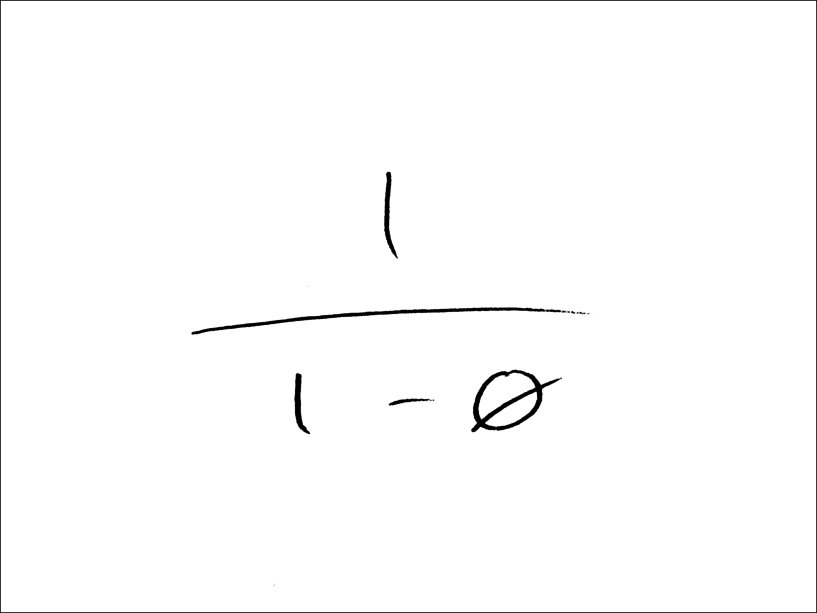

In [18]:
binarymatrixtoimage(bm)

In [19]:
function rowdetect(data)
    width = size(data, 1)
    height = size(data, 2)
    result = Array(Int, width, height)
    line = false
    for y = 1:height
        if (mean(data[1:width, y]) == 1 && line == false)
            result[1:width, y] = 0 
            line = true
        elseif (mean(data[1:width, y]) < 1)
            result[1:width, y] = data[1:width, y] 
            line = false
        else
            result[1:width, y] = 1
        end
    end
    result
end

rowdetect (generic function with 1 method)

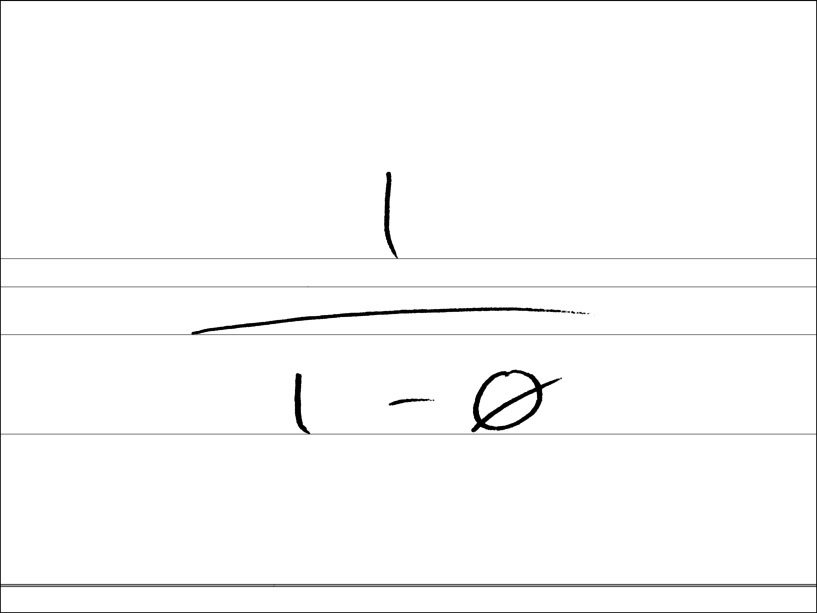

In [21]:
bl = binarymatrixtoimage(rowdetect(bm))